In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [108]:
## train

pitcher_train = pd.read_csv("pitcher_train.csv")
batter_train = pd.read_csv("batter_train.csv")

## test

pitcher_test = pd.read_csv("pitcher_test.csv", index_col  = 0)
batter_test = pd.read_csv("batter_test.csv", index_col  = 0)

In [109]:
print(pitcher_train.shape)
print(pitcher_test.shape)

print(batter_train.shape)
print(batter_test.shape)

(27298, 21)
(234, 20)
(80395, 13)
(299, 12)


## 변수제거

In [110]:
batter_train=batter_train[["TB_SC","PA-AB","RUN","RBI","SH+SF","KK","SB_trial","BABIP","AB","HIT"]]
batter_test=batter_test[["TB_SC","PA-AB","RUN","RBI","SH+SF","KK","SB_trial","BABIP"]]

pitcher_train=pitcher_train[["TB_SC","PA-AB","H1","H2","H3","HR","SB_SR","WP","BABIP","KK9","BB9","INN2","ER"]]
pitcher_test=pitcher_test[["TB_SC","PA-AB","H1","H2","H3","HR","SB_SR","WP","BABIP","KK9","BB9"]]

In [111]:
print(pitcher_train.shape)
print(pitcher_test.shape)

print(batter_train.shape)
print(batter_test.shape)

(27298, 13)
(234, 11)
(80395, 10)
(299, 8)


# Model Train

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

### 투수 - INN2

In [113]:
pitcher_train.dtypes

TB_SC     object
PA-AB    float64
H1       float64
H2       float64
H3       float64
HR       float64
SB_SR    float64
WP       float64
BABIP    float64
KK9      float64
BB9      float64
INN2       int64
ER         int64
dtype: object

In [114]:
cat_features = ['TB_SC']
pitcher_train[cat_features] = pitcher_train[cat_features].astype('category')

pitcher_train.dtypes

TB_SC    category
PA-AB     float64
H1        float64
H2        float64
H3        float64
HR        float64
SB_SR     float64
WP        float64
BABIP     float64
KK9       float64
BB9       float64
INN2        int64
ER          int64
dtype: object

In [115]:
pitcher_test[cat_features] = pitcher_test[cat_features].astype('category')

pitcher_test.dtypes

TB_SC    category
PA-AB       int64
H1          int64
H2          int64
H3          int64
HR          int64
SB_SR     float64
WP          int64
BABIP     float64
KK9       float64
BB9       float64
dtype: object

In [116]:
X = pitcher_train.drop(columns = ['INN2','ER'])
y = pitcher_train['INN2']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 2020)

print(X_train.shape)
print(X_val.shape)
print(X.shape)

(19108, 11)
(8190, 11)
(27298, 11)


In [117]:
X_train.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train.columns]
X_val.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_val.columns]

In [118]:
# same code again (not needed but doesn't bite)
cat_features = ['TB_SC']
pitcher_train[cat_features] = pitcher_train[cat_features].astype('category')

pitcher_train.dtypes

TB_SC    category
PA-AB     float64
H1        float64
H2        float64
H3        float64
HR        float64
SB_SR     float64
WP        float64
BABIP     float64
KK9       float64
BB9       float64
INN2        int64
ER          int64
dtype: object

In [119]:
#sklearn 을 이용한 random forest는 dummy변수화 해줘야 함.
pitcher_train = pd.get_dummies(pitcher_train)
pitcher_train.head()

,PA-AB,H1,H2,H3,HR,SB_SR,WP,BABIP,KK9,BB9,INN2,ER,TB_SC_B,TB_SC_T
0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.277778,3.600000,1.800000,19,2,0,1
1,1.0,7.0,2.0,0.0,0.0,0.0,0.0,0.333333,2.842105,0.000000,16,8,1,0
2,2.0,7.0,1.0,0.0,1.0,0.0,0.0,0.380952,3.375000,3.375000,15,5,1,0
3,1.0,6.0,1.0,0.0,2.0,1.0,0.0,0.368421,3.600000,1.800000,21,0,1,0
4,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.100000,2.571429,3.857143,15,3,1,0


In [120]:
pitcher_test = pd.get_dummies(pitcher_test)
pitcher_test.head()

,PA-AB,H1,H2,H3,HR,SB_SR,WP,BABIP,KK9,BB9,TB_SC_B,TB_SC_T
B,,,,,,,,,,,,
0,2,4,1,0,0,0.0,0,0.294118,6.000000,3.000000,0,1
1,4,0,0,0,1,0.0,0,0.000000,0.000000,54.000000,1,0
0,2,8,1,1,1,0.0,1,0.526316,11.571429,3.857143,0,1
1,5,4,0,0,0,0.0,0,0.200000,5.400000,6.750000,1,0
0,0,0,0,0,0,0.0,0,0.000000,0.000000,0.000000,0,1


In [121]:
X = pitcher_train.drop(columns = ['INN2','ER'])
y = pitcher_train['INN2']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 2020)

print(X_train.shape)
print(X_val.shape)

print(X.shape)

(19108, 12)
(8190, 12)
(27298, 12)


In [122]:
estimator = RandomForestRegressor(random_state=2020)

para_grids = {
            "n_estimators" : [500, 1000],
            "max_depth" : [None, 10, 30],
            "min_samples_split" : [2, 5, 10],
            "min_samples_leaf" : [1, 5, 10],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

grid = GridSearchCV(estimator, para_grids, cv=3, n_jobs=-1, verbose=3, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
forest = grid.best_estimator_

reg_prediction=forest.predict(X_val)

print (grid.best_score_, grid.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 47.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 74.1min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed: 94.0min finished


-12.929573454746972 {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 1000}


In [123]:
mse = mean_squared_error(y_val, reg_prediction)
mse

12.708676002629474

In [124]:
INN2_predicted_rf = grid.predict(pitcher_test)
INN2_predicted_rf

array([15.62867451,  6.33510946, 18.15569378, 15.69883308,  3.2133788 ,
        3.19905375,  3.47753258,  4.62253097, 17.326515  , 12.10947042,
        3.99920735, 14.41589452, 16.08088534,  3.1854672 , 16.55184964,
        3.30443755, 18.56353884, 15.53030601,  3.27952701,  2.87866206,
        6.93052616, 16.2404967 , 14.02350744,  3.19323307, 16.14560241,
        3.35883041,  3.19640742, 16.81676464,  7.17330764,  8.76954267,
        3.14597616,  8.79948707,  3.43751721,  2.90546545, 15.66281066,
        3.21990429, 15.30169015,  3.24111575,  3.28405722,  4.61396533,
        3.2133788 ,  3.22047235, 13.20141418,  3.27886648,  3.23343038,
        3.36279188,  3.44837715,  3.21366848,  3.22047235,  3.23325162,
        6.26099332,  3.42512191,  3.27752755, 17.4012809 ,  3.20413854,
        7.51257674, 10.51508199,  3.19339589,  5.49323982, 17.02088923,
        3.2133788 ,  3.30230731,  4.67822741,  3.14277585,  3.38745114,
        3.55365211,  2.90546545,  3.21883848,  3.19339589,  3.45

In [125]:
rf_feature_importance = grid.best_estimator_.feature_importances_
rf_feature_imp=pd.Series(rf_feature_importance,index=X_train.columns).sort_values(ascending=False)
rf_feature_imp

H1         0.602084
BABIP      0.175121
PA-AB      0.066586
BB9        0.054220
KK9        0.045278
H2         0.036780
HR         0.008554
SB_SR      0.003253
WP         0.002329
TB_SC_B    0.002304
TB_SC_T    0.002253
H3         0.001238
dtype: float64

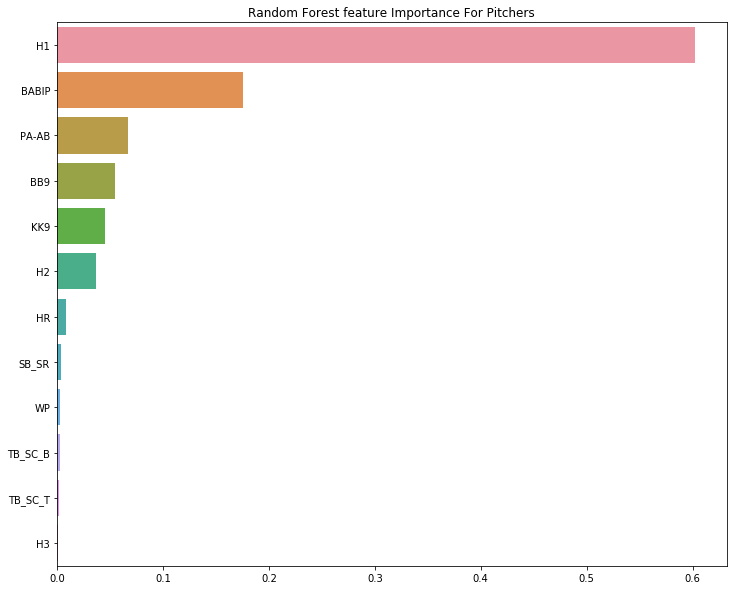

In [126]:
plt.figure(figsize=(12,10))
plt.title("Random Forest feature Importance For Pitchers")
sns.barplot(x=rf_feature_imp[0:30], y=rf_feature_imp.index[0:30])

## 투수-ER

In [127]:
X = pitcher_train.drop(columns = ['INN2','ER'])
y = pitcher_train['ER']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 2020)

print(X_train.shape)
print(X_val.shape)

print(X.shape)

(19108, 12)
(8190, 12)
(27298, 12)


In [128]:
estimator = RandomForestRegressor(random_state=2020)

para_grids = {
            "n_estimators" : [500, 1000],
            "max_depth" : [None, 10, 30],
            "min_samples_split" : [2, 5, 10],
            "min_samples_leaf" : [1, 5, 10],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }

grid = GridSearchCV(estimator, para_grids, cv=3, n_jobs=-1, verbose=3, scoring = 'neg_mean_squared_error')
grid.fit(X_train, y_train)
forest = grid.best_estimator_

reg_prediction=forest.predict(X_val)

print (grid.best_score_, grid.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 67.1min
[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed: 86.5min finished


-2.044278431463109 {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500}


In [129]:
mse = mean_squared_error(y_val, reg_prediction)
mse

2.019370668538266

In [130]:
ER_predicted_rf = grid.predict(pitcher_test)
ER_predicted_rf

array([2.48283356, 0.78228958, 2.6570999 , 2.9455165 , 0.57439221,
       0.66999314, 0.4484235 , 0.99329434, 2.69274409, 2.46119238,
       0.87917228, 2.77987665, 2.37280416, 0.59164805, 1.99003274,
       0.68910566, 2.99190036, 2.77668054, 0.57752858, 0.58584009,
       1.52938656, 2.45375941, 2.9758702 , 0.60905843, 2.53063866,
       0.60067828, 0.6031663 , 2.04878081, 1.68648116, 1.60610853,
       0.82511559, 1.63143305, 0.79381292, 0.48852761, 2.73077853,
       0.54748098, 2.06167477, 0.66856943, 0.545237  , 0.78010816,
       0.57439221, 0.55283757, 1.91036471, 0.6493955 , 0.57422263,
       0.60172984, 0.62803184, 0.63521388, 0.55283757, 0.5991527 ,
       1.66934597, 0.68001475, 0.58740951, 2.14045547, 0.68584336,
       1.59403125, 2.23698209, 0.49396873, 1.56411956, 2.67083734,
       0.57439221, 0.65939306, 0.78577353, 0.46193604, 0.55837282,
       0.53132727, 0.48852761, 0.52441143, 0.49396873, 0.66040845,
       0.79238323, 0.58433271, 0.71953006, 0.92496592, 0.61118

In [131]:
rf_feature_importance = grid.best_estimator_.feature_importances_
rf_feature_imp=pd.Series(rf_feature_importance,index=X_train.columns).sort_values(ascending=False)
rf_feature_imp

H1         0.313901
PA-AB      0.144667
BABIP      0.139558
BB9        0.133502
H2         0.088781
KK9        0.079677
HR         0.048271
SB_SR      0.020882
WP         0.011150
TB_SC_T    0.008133
TB_SC_B    0.007807
H3         0.003670
dtype: float64

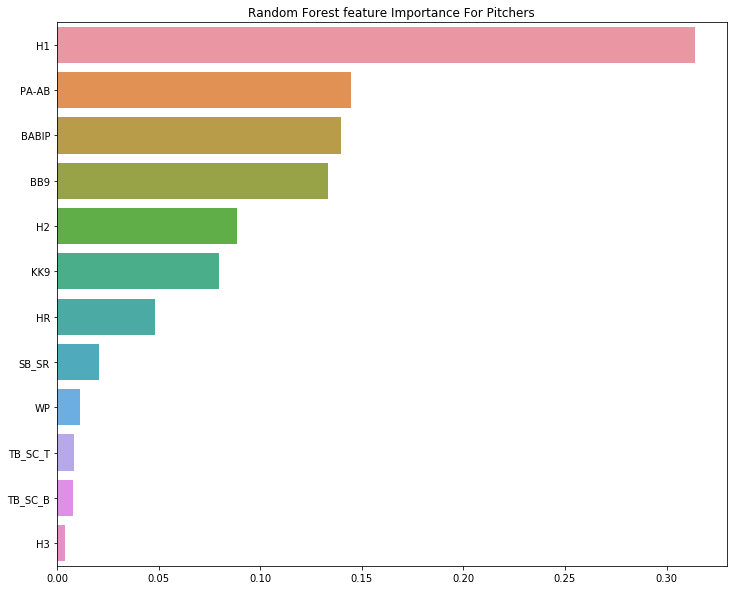

In [132]:
plt.figure(figsize=(12,10))
plt.title("Random Forest feature Importance For Pitchers")
sns.barplot(x=rf_feature_imp[0:30], y=rf_feature_imp.index[0:30])

## 입력

In [134]:
pitcher_test = pd.read_csv("pitcher_test.csv", index_col  = 0)
pitcher_test.head()

,T,GDAY_DS,T_ID,P_ID,TB_SC,BF,PA-AB,AB,HIT,H1,H2,H3,HR,SB_SR,KK,WP,SLG,BABIP,KK9,BB9
B,,,,,,,,,,,,,,,,,,,,
0,1,2020-07-17,KT,50030,T,91,2,21,5,4,1,0,0,0.0,4,0,1,0.294118,6.000000,3.000000
1,0,2020-06-10,KT,50036,B,19,4,3,1,0,0,0,1,0.0,0,0,1,0.000000,0.000000,54.000000
0,1,2020-07-19,KT,50040,T,123,2,26,11,8,1,1,1,0.0,6,1,3,0.526316,11.571429,3.857143
1,0,2020-07-11,LG,50126,B,108,5,24,4,4,0,0,0,0.0,4,0,0,0.200000,5.400000,6.750000
0,1,2020-07-07,LG,50157,T,1,0,1,0,0,0,0,0,0.0,0,0,0,0.000000,0.000000,0.000000


In [135]:
pitcher_test['INN2'] = np.round(INN2_predicted_rf,2)
pitcher_test['ER'] = np.round(ER_predicted_rf,2)
pitcher_test

,T,GDAY_DS,T_ID,P_ID,TB_SC,BF,PA-AB,AB,HIT,H1,...,HR,SB_SR,KK,WP,SLG,BABIP,KK9,BB9,INN2,ER
B,,,,,,,,,,,,,,,,,,,,,
0,1,2020-07-17,KT,50030,T,91,2,21,5,4,...,0,0.0,4,0,1,0.294118,6.000000,3.000000,15.63,2.48
1,0,2020-06-10,KT,50036,B,19,4,3,1,0,...,1,0.0,0,0,1,0.000000,0.000000,54.000000,6.34,0.78
0,1,2020-07-19,KT,50040,T,123,2,26,11,8,...,1,0.0,6,1,3,0.526316,11.571429,3.857143,18.16,2.66
1,0,2020-07-11,LG,50126,B,108,5,24,4,4,...,0,0.0,4,0,0,0.200000,5.400000,6.750000,15.70,2.95
0,1,2020-07-07,LG,50157,T,1,0,1,0,0,...,0,0.0,0,0,0,0.000000,0.000000,0.000000,3.21,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,2020-07-17,LT,79545,T,26,2,4,2,2,...,0,0.0,0,0,0,0.400000,0.000000,9.000000,3.22,0.75
1,0,2020-07-08,HH,79764,B,31,1,6,4,3,...,1,1.0,1,1,1,0.750000,13.500000,13.500000,4.52,1.01
0,1,2020-07-16,LG,79825,T,19,0,6,3,1,...,1,0.0,0,1,2,0.400000,0.000000,0.000000,3.97,0.66


In [136]:
er_by_team = pitcher_test['ER'].groupby(pitcher_test['T_ID']).sum()

er_by_team

T_ID
HH    33.73
HT    29.23
KT    29.01
LG    27.33
LT    27.84
NC    27.22
OB    26.04
SK    26.94
SS    30.92
WO    27.97
Name: ER, dtype: float64

In [137]:
inning_by_team = pitcher_test['INN2'].groupby(pitcher_test['T_ID']).sum()

inning_by_team

T_ID
HH    177.09
HT    146.44
KT    176.33
LG    150.47
LT    153.55
NC    156.77
OB    151.42
SK    151.32
SS    173.28
WO    154.09
Name: INN2, dtype: float64

In [138]:
era_by_team = er_by_team / inning_by_team * 27

era_by_team

T_ID
HH    5.142639
HT    5.389306
KT    4.442069
LG    4.904034
LT    4.895344
NC    4.688014
OB    4.643244
SK    4.806899
SS    4.817867
WO    4.900967
dtype: float64

In [142]:
pitcher_test.to_csv("C:/Users/ishon/OneDrive/바탕 화면/big_con_final/big_contest_2020_summer/modeling_code/report_data/new_pitcher_report_rf.csv")